In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Content
1. [Read Data](#1)    
1. [Visualization](#2)
1. [Data Preproccesing](#3)
1. [KNN Model](#4) 
1. [KNN with Sklearn and Evaluation](#5) 
1. [Conclusion](#6) 

<a id = '1'></a><br>
## Read Data

In [ ]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.info()

#### Columns are non null this and except for class other ones are float

In [ ]:
data.describe()

In [ ]:
data.corr()

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Corrolation Map")
plt.show()

<a id = '2'></a><br>
## Visulization

In [ ]:
data["class"].value_counts()

In [ ]:
sns.countplot(data["class"], palette="Set2")
plt.title("Amount")
plt.show()

In [ ]:
sns.pairplot(data=data, hue="class")
plt.show()

#### Obviously, some datas are clearly seperable

In [ ]:
sns.violinplot(x=data["class"], y = data["pelvic_incidence"])
plt.show()

<a id = '3'></a><br>
## Data Preproccesing

#### The target value is class feature (dependent veriable) but as you see, class feature's columns defined as Abnormal and Normal. Machines can not understand that. So, we need to convert a int or float format

#### After convertion, we must seperate them to x and y

In [ ]:
data["class"] = [0 if i == "Abnormal" else 1 for i in data["class"]]
y = data["class"].values

In [ ]:
y

In [ ]:
x_data = data.drop(["class"], axis=1)

#### We need to make normalization on data because in this data there are some values like 63.02, 114.40 and there are binary values like 0 and 1. This may cause overtower between datas on features. To prevent this, we are doing normalization

### X_normalized = (x - x minimum)/(x maximum - x minimum)


In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values
x

#### Now its time to split to train and test datas.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

<a id = '4'></a><br>
## KNN model

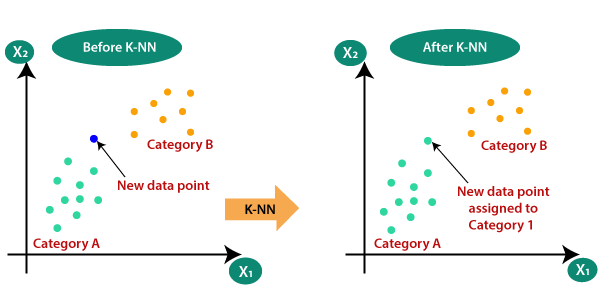

#### KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification). KNN works on a principle assuming every data point falling in near to each other is falling in the same class. In other words it classifies a new data point based on similarity.

#### As an illustration, if K = 5 : The algorithm would calculate the the distance of 5 nearest neigbhors for the data that will be predicted then according to result, for example 4 category A and 1 category B, the classification will be made as category A

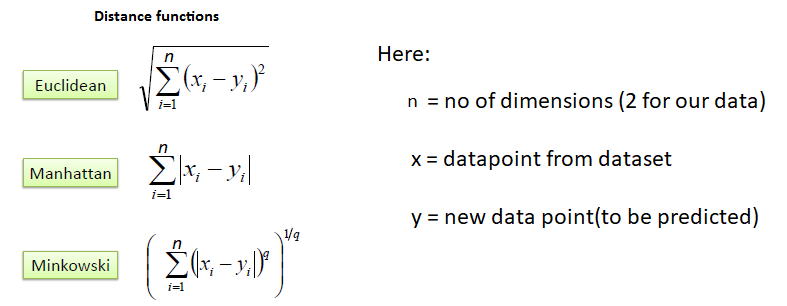

#### These are the equations for finding distances between data points. Euclidian is the most popular one and sklearn uses it by default in KNN.

<a id = '5'></a><br>
## KNN with Sklearn and Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) #k value
knn.fit(x_train, y_train)
print(" {} nn score: {} ".format(5,knn.score(x_test,y_test)))

#### You might ask what is the optimum n_neighbors or k value for KNN :

In [ ]:
score_list = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
score_list

#### Finding maximum accuracy and plotting in which values we get it :

In [ ]:
current_max = score_list[0]
for i in range(len(score_list)):
    if current_max < score_list[i]:
        current_max = score_list[i]
current_max

In [ ]:
plt.plot(range(1,20),score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors = 8) #k value
knn3.fit(x_train, y_train)
print(" {} nn score: {} ".format(8,knn3.score(x_test,y_test)))

#### After finding the optimum point, lets check confusion matrix.

In [ ]:
y_pred_knn = knn3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("KNN result confusion matrix : \n", cm)

In [ ]:
#confusion metrics visualization
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.show()

#### As you see, the model predicted 56 true out of 62 and 6 wrong (Predicted 2 abnormal as normal, 4 normal as abnormal).

<a id = '6'></a><br>
## Conclusion

#### In this tutorial, first we read the data and had ideas about it, then visualize it after that we constituted the KNN model, lastly evaluated it with accuracy and confusion matrix.